# Stokes first and second problem

Philipp Schlatter, 2022

Preliminaries:

In [1]:
%matplotlib notebook

#!pip install scipy     # Maybe needed on Binder environments
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from scipy.special import erf
from IPython import display

## First Stokes problem: Impusively started plate

Consider a plate that is impulsively starting to move with velocity $V$ in the $x$-direction for $t>0$. Then,  we can use a similarity approach to solve for the velocity profile $u(y,t)$ above the plate. This solution will contain the so-called *error function* $\mathrm{erf}(z)$,

$$\mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-q^2} \mathrm{d}q \ . $$

<IPython.core.display.Javascript object>


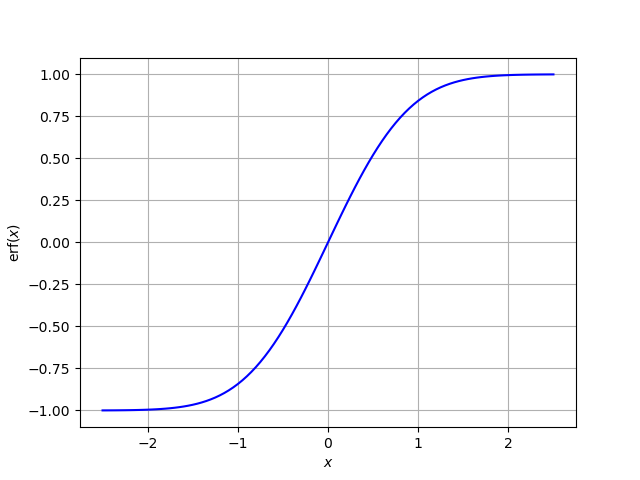

In [2]:
x=np.linspace(-2.5,2.5,101);
plt.figure()
plt.xlabel(f'$x$')
plt.ylabel(f'erf$(x)$')
plt.plot( x, erf(x),'b')
plt.grid()
plt.show()

With the similarity variable, 
$$ \eta =\frac{y}{2\sqrt{\nu t}}\ , $$

we obtain the similarity solution $f(\eta) = u/V$

$$f(\eta) = 1 - \mathrm{erf}\left(\frac{\eta}{2}\right) \ .$$

Thus, the actual velocity profile is then given as

$$ u(y,t) = V \left[1 - \mathrm{erf}\left(\frac{y}{2\sqrt{\nu t}}\right) \right]\ . $$

The value $f(\eta)=0.01$ is obtained for $\eta\approx 3.64$.


<IPython.core.display.Javascript object>


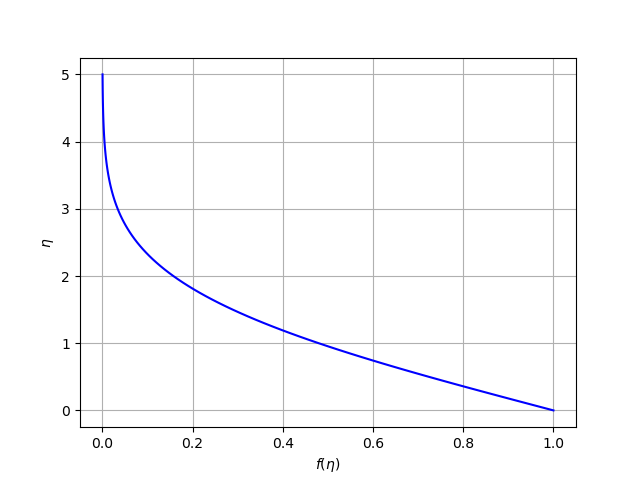

In [3]:
eta=np.linspace(0,5,101);
plt.figure()
plt.xlabel(f'$f(\eta)$')
plt.ylabel(f'$\eta$')
plt.plot( 1-erf(eta/2),eta,'b')
plt.grid()
plt.show()

## Second Stokes problem: Oscillating plate

Let us assume a plate which moves with velocity $V \cos(\omega t)$ in the $x$-direction. Then, the velocity profile $u(y,t)$ is obtained as the solution to Stokes second problem as follows:

$$u(y,t) = V e^{-k y} \cos ( \omega t - k y) \ ,$$

with $k=\sqrt{\omega / (2\nu)}$. A non-dimensional form is then obtained as $u/V(k y, \omega t)$ and visualised with the following code:

<IPython.core.display.Javascript object>


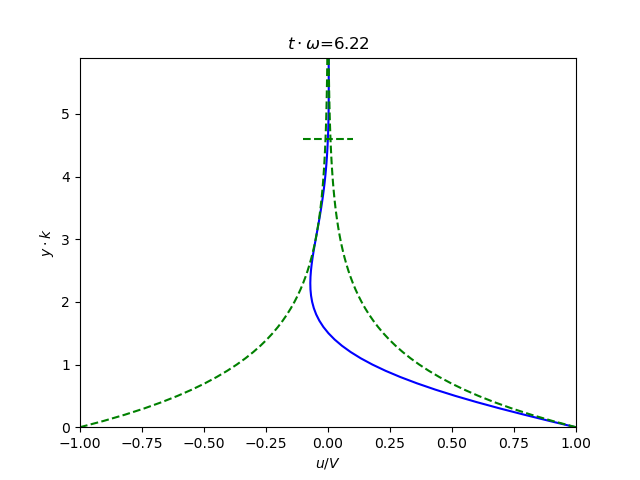

In [4]:
yk = np.arange(0,6,0.1)
dk = 4.6
tmax=2*np.pi # period
tom=np.arange(0,tmax,tmax/100)

u = lambda tom : np.exp(-yk)*np.cos(yk-tom);
um = np.exp(-yk);

fig,ax = plt.subplots(1)
ell, = ax.plot([],[],color='b')

def init():
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, yk[-1]])
    ax.plot(um, yk,'g--')
    ax.plot(-um, yk,'g--')
    ax.plot([-0.1,0.1],[dk,dk],'g--')
    ax.set_xlabel(f'$u / V$')
    ax.set_ylabel(f'$y \cdot k$')    
    
def animate(j):
    ell.set_data(u(tom[j]),yk)
    ax.set_title(f'$t \cdot \omega$={tom[j]:.2f}')
    return ell,ax
                
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=tom.size, init_func=init, repeat=False,blit=True,interval=10)

In [149]:
# convert to html5 video
# plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)